In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import matplotlib
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica Neue'], 'size':30})
rc('text', usetex=False)


In [2]:
clasrms = np.load('classic_rms/classic_rms.npy')

In [3]:
np.mean(clasrms * 1e6)

0.3105024602336056

In [4]:
if False:
    caldata = np.load('errpred_random_draw1_high_shrinkage/caldata.bin.npz')
    nn = caldata['arr_0']
    needed = caldata['arr_1']
    uncertainty = caldata['arr_2']
    est = caldata['arr_3']
    est_var = caldata['arr_4']
    rms = caldata['arr_5']
    Sigma = caldata['arr_6'] 

In [5]:
def plot_covmatrix(Sigma, ax = None):
    fig = None
    if ax is None:
        fig = plt.figure(figsize = (20, 20))
        ax = plt.gca()
    im = ax.imshow(np.log10(np.abs(Sigma)), cmap = 'inferno')

    if fig is not None:
        fig.tight_layout()
        fig.colorbar(im)

In [6]:
def plot_rms(est, est_var, rms, ax = None):
    fig = None
    if ax is None:
        fig = plt.figure(figsize = (20, 12))
        ax = plt.gca()

    _ = ax.hist(rms * 1e6, 50)
    yl = np.max(_[0])
    mean_rms = np.mean(rms * 1e6)
    mu     = np.mean(est) * 1e6
    std    = np.sqrt(np.mean(est_var)) * 1e6
    rect = pch.Rectangle((mu - std, 0), 2 * std, yl, facecolor = 'green', alpha = .25, zorder = -1)
    ax.add_patch(rect)
    ax.plot([6, 6], [0, yl], label = r'Calibration goal (6 µm)', linewidth = 8, linestyle = 'solid')
    ax.plot([mu, mu], [0, yl], label = fr'Mean predicted RMS  ({mu:.2f} ± {std:.2f} µm)', linewidth = 8, linestyle = 'dashed', color = 'green')
    
    ax.plot([mean_rms, mean_rms], [0, yl], label = fr'Mean observed RMS ({mean_rms:.2f} µm)', linewidth = 8, color = 'black', linestyle = 'dotted')
    ax.set_xlim([0.2, 10])
    ax.legend(loc='upper right')
    ax.set_xlabel('Residual RMS [µm]')
    ax.set_ylabel('Number of calibrations')
    ax.set_xscale('log')
    ax.set_xticks([0.1, 0.25, 0.5, 1, 2.5, 5, 10])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))

    ax.yaxis.set_major_locator(MaxNLocator(prune='both'))

    if fig is not None:
        fig.tight_layout()

In [7]:
def plot_comparison(rms, ax = None):
    fig = None
    if ax is None:
        fig = plt.figure(figsize = (20, 12))
        ax = plt.gca()

    counts1, bins1, _ = ax.hist(rms * 1e6, 100, label = 'Bayesian calibration', alpha = .5, range = (0.16, 0.8))
    counts2, bins2, _ = ax.hist(clasrms * 1e6, 100, label = 'Classical calibration', alpha = .5, range = (0.16, 0.8))

    max_y = max(np.max(counts1), np.max(counts2))
    
    ax.legend()
    ax.set_xlabel('Residual RMS [µm]')
    ax.set_ylabel('Number of calibrations')
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
    ax.set_xlim([0.16, 0.55])
    ax.set_ylim([0, 1.1 * max_y])
    ax.yaxis.set_major_locator(MaxNLocator(prune='both'))
    
    if fig is not None:
        fig.tight_layout()

In [69]:
def gen_all_plots(direc, ax1 = None, ax2 = None):
    caldata = np.load(direc + '/caldata.bin.npz')
    nn = caldata['arr_0']
    needed = caldata['arr_1']
    uncertainty = caldata['arr_2']
    est = caldata['arr_3']
    est_var = caldata['arr_4']
    rms = caldata['arr_5']
    Sigma = caldata['arr_6'] 
    
    try:
        f1 = np.load(direc + '/distances.bin.npz')
        L1 = f1['arr_0'][:, :]
    
        dx = L1[:, 1, 0::2]
        dy = L1[:, 1, 1::2]
        d2 = dx ** 2 + dy ** 2
        rms = np.sqrt(.5 * np.mean(d2, axis = 1))
    except:
        pass
    
    #plot_covmatrix(Sigma)
    #plt.savefig(fr'{direc}-covmatrix.svg',bbox_inches='tight')
    plot_rms(est, est_var, rms, ax = ax1)
    plt.savefig(fr'{direc}-rms.svg',bbox_inches='tight')
    plot_comparison(rms, ax = ax2)
    plt.savefig(fr'{direc}-comparison.svg',bbox_inches='tight')

In [80]:
def gen_compare_plots(direc, ax1 = None):
    caldata = np.load(direc + '/caldata.bin.npz')
    nn = caldata['arr_0']
    needed = caldata['arr_1']
    uncertainty = caldata['arr_2']
    est = caldata['arr_3']
    est_var = caldata['arr_4']
    rms = caldata['arr_5']
    Sigma = caldata['arr_6'] 
    
    try:
        f1 = np.load(direc + '/distances.bin.npz')
        L1 = f1['arr_0'][:, :]
    
        dx = L1[:, 1, 0::2]
        dy = L1[:, 1, 1::2]
        d2 = dx ** 2 + dy ** 2
        rms = np.sqrt(.5 * np.mean(d2, axis = 1))
    except:
        pass
    
    #plot_covmatrix(Sigma)
    #plt.savefig(fr'{direc}-covmatrix.svg',bbox_inches='tight')
    # plot_rms(est, est_var, rms, ax = ax1)
    plot_comparison(rms, ax = ax1)
    plt.savefig(fr'{direc}-rms.svg',bbox_inches='tight')

In [85]:
def gen_side_by_side_plots(direc1, direc2):
    fig, ax = plt.subplots(2, 1, figsize = (20, 20))
    
    gen_compare_plots(direc1, ax[0])
    gen_compare_plots(direc2, ax[1])
    
    plt.savefig(fr'{direc1}-{direc2}-comparison.svg',bbox_inches='tight')

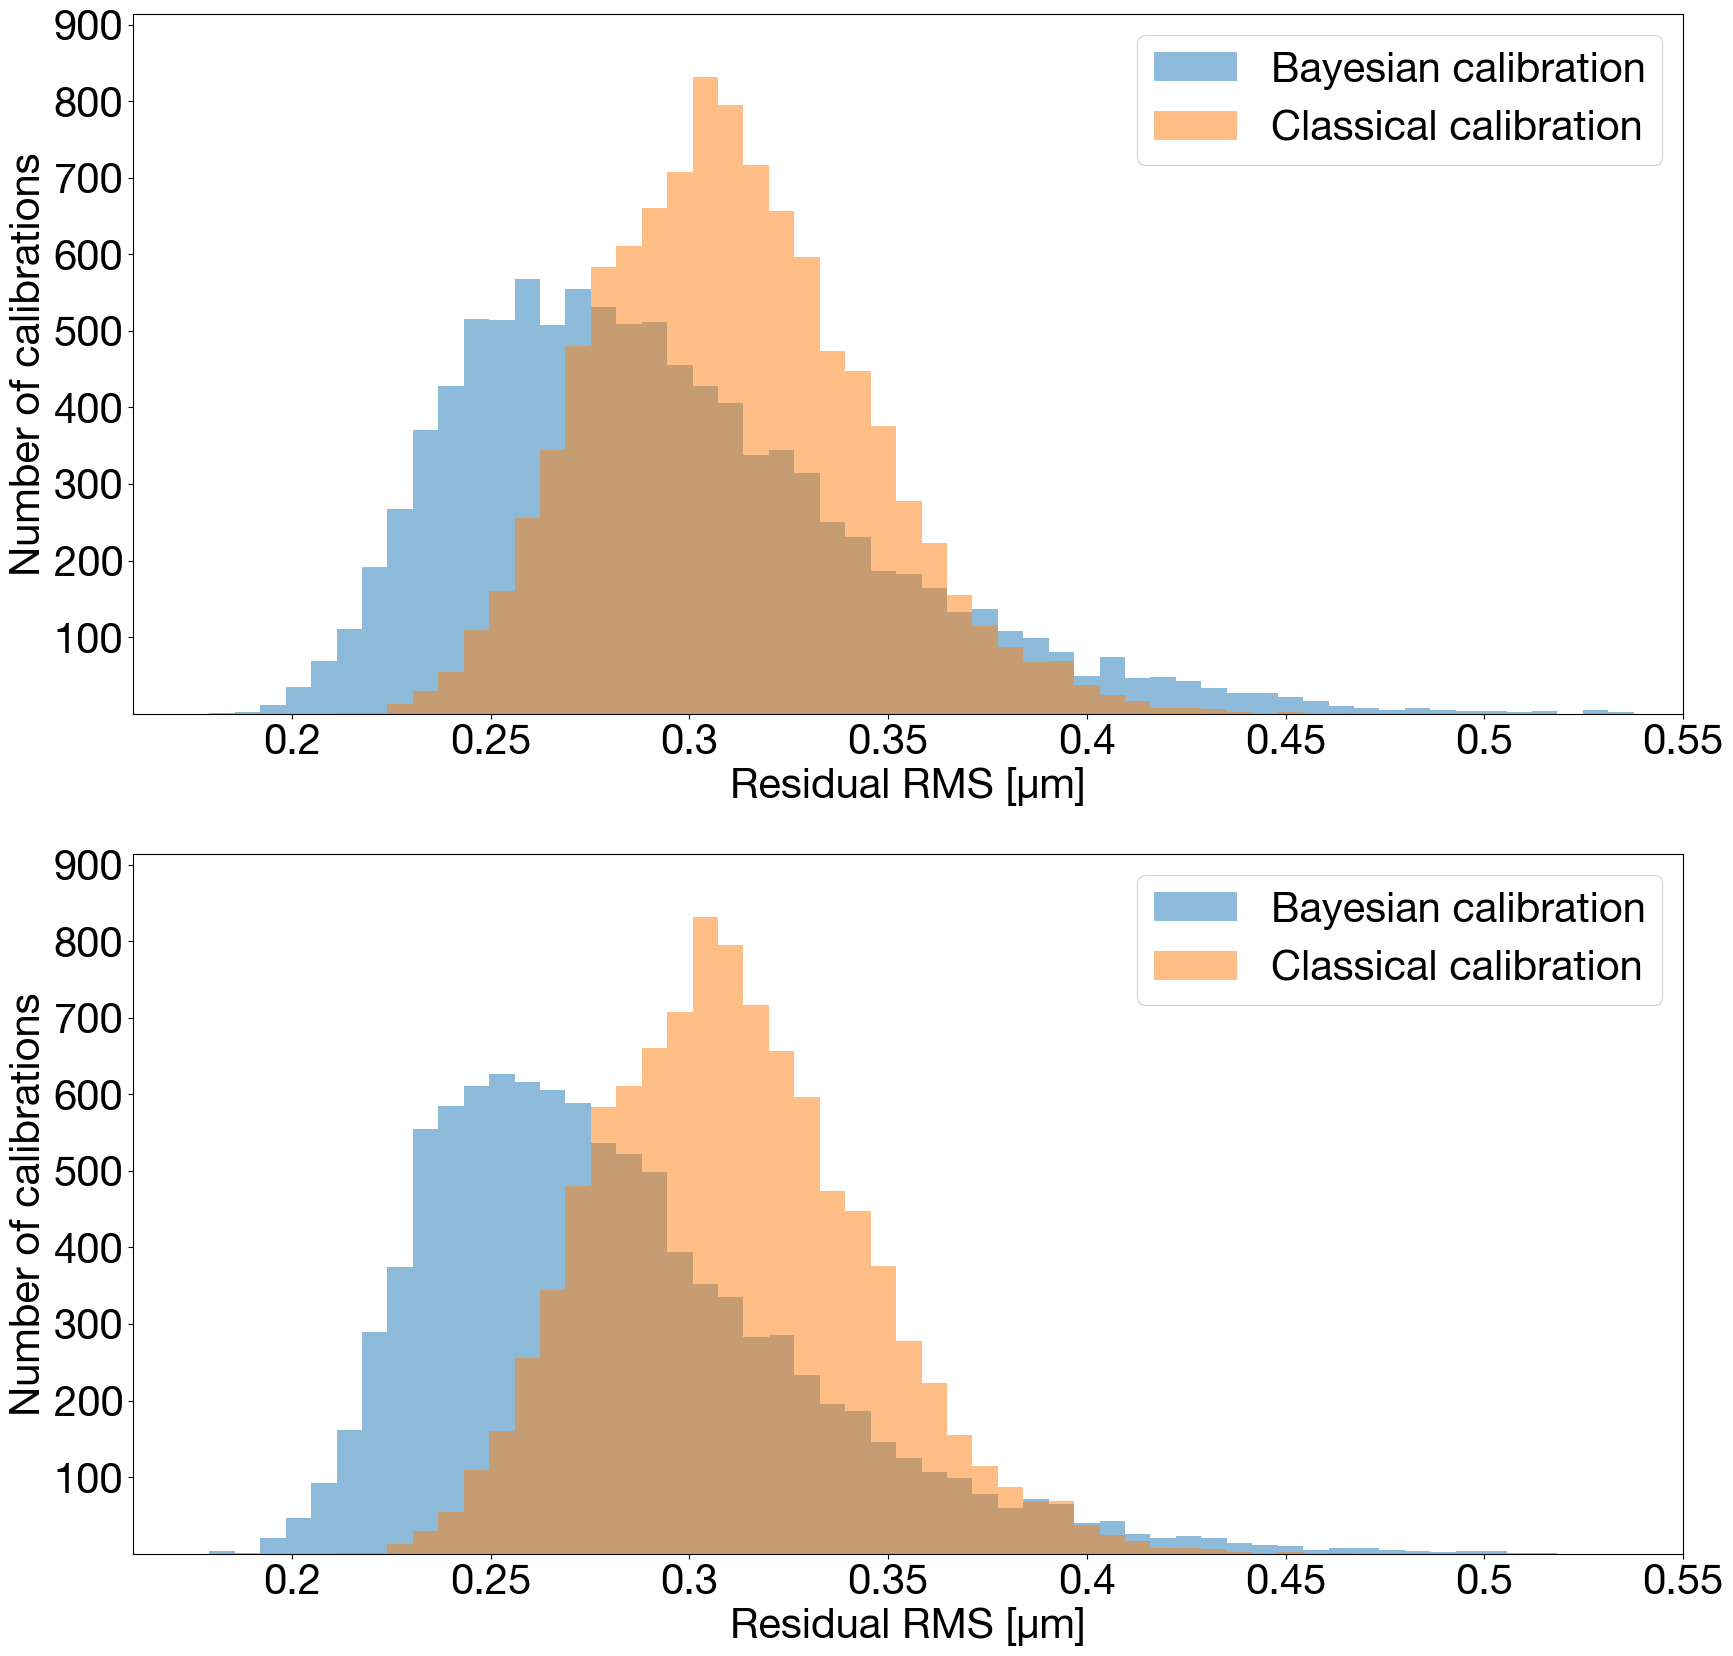

In [87]:
gen_side_by_side_plots('errpred_1draw_25cal', 'errpred_2draw_25cal')

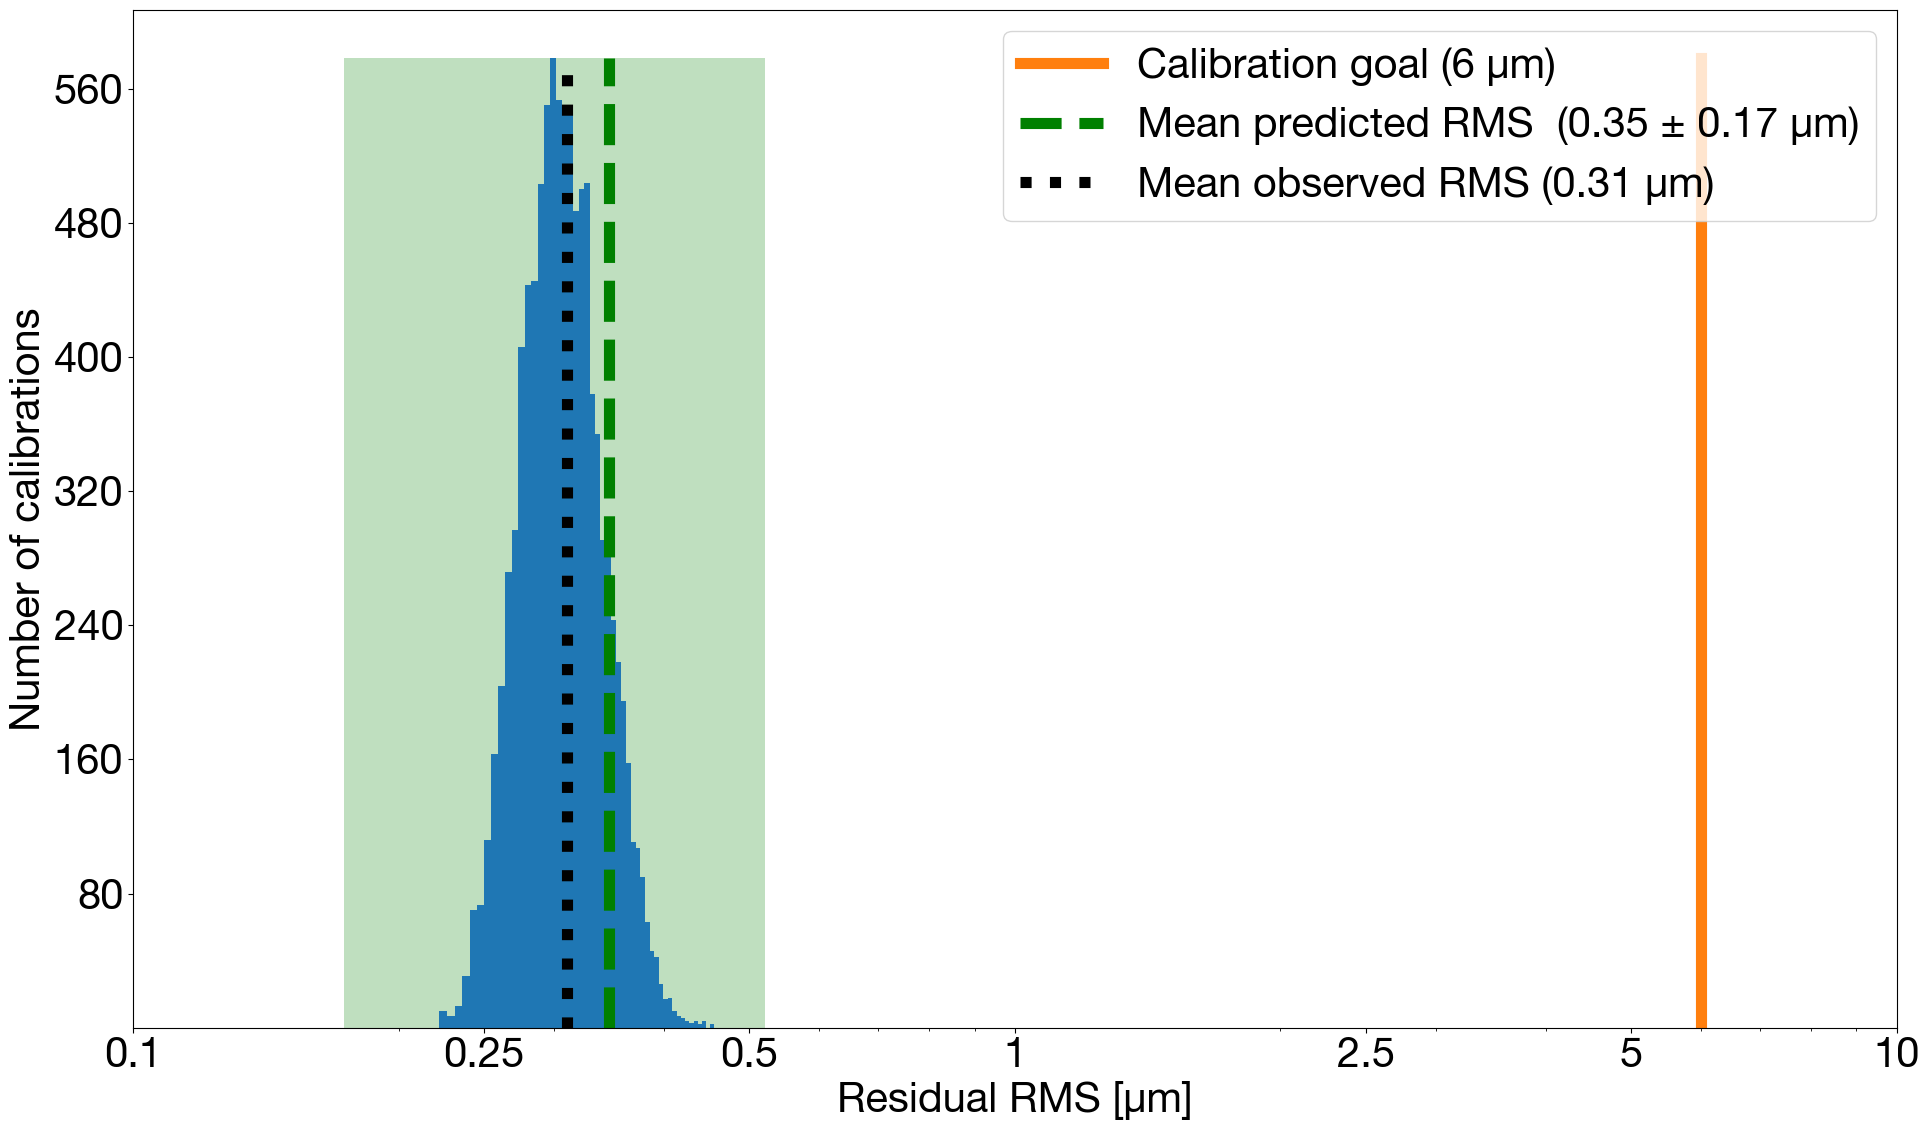

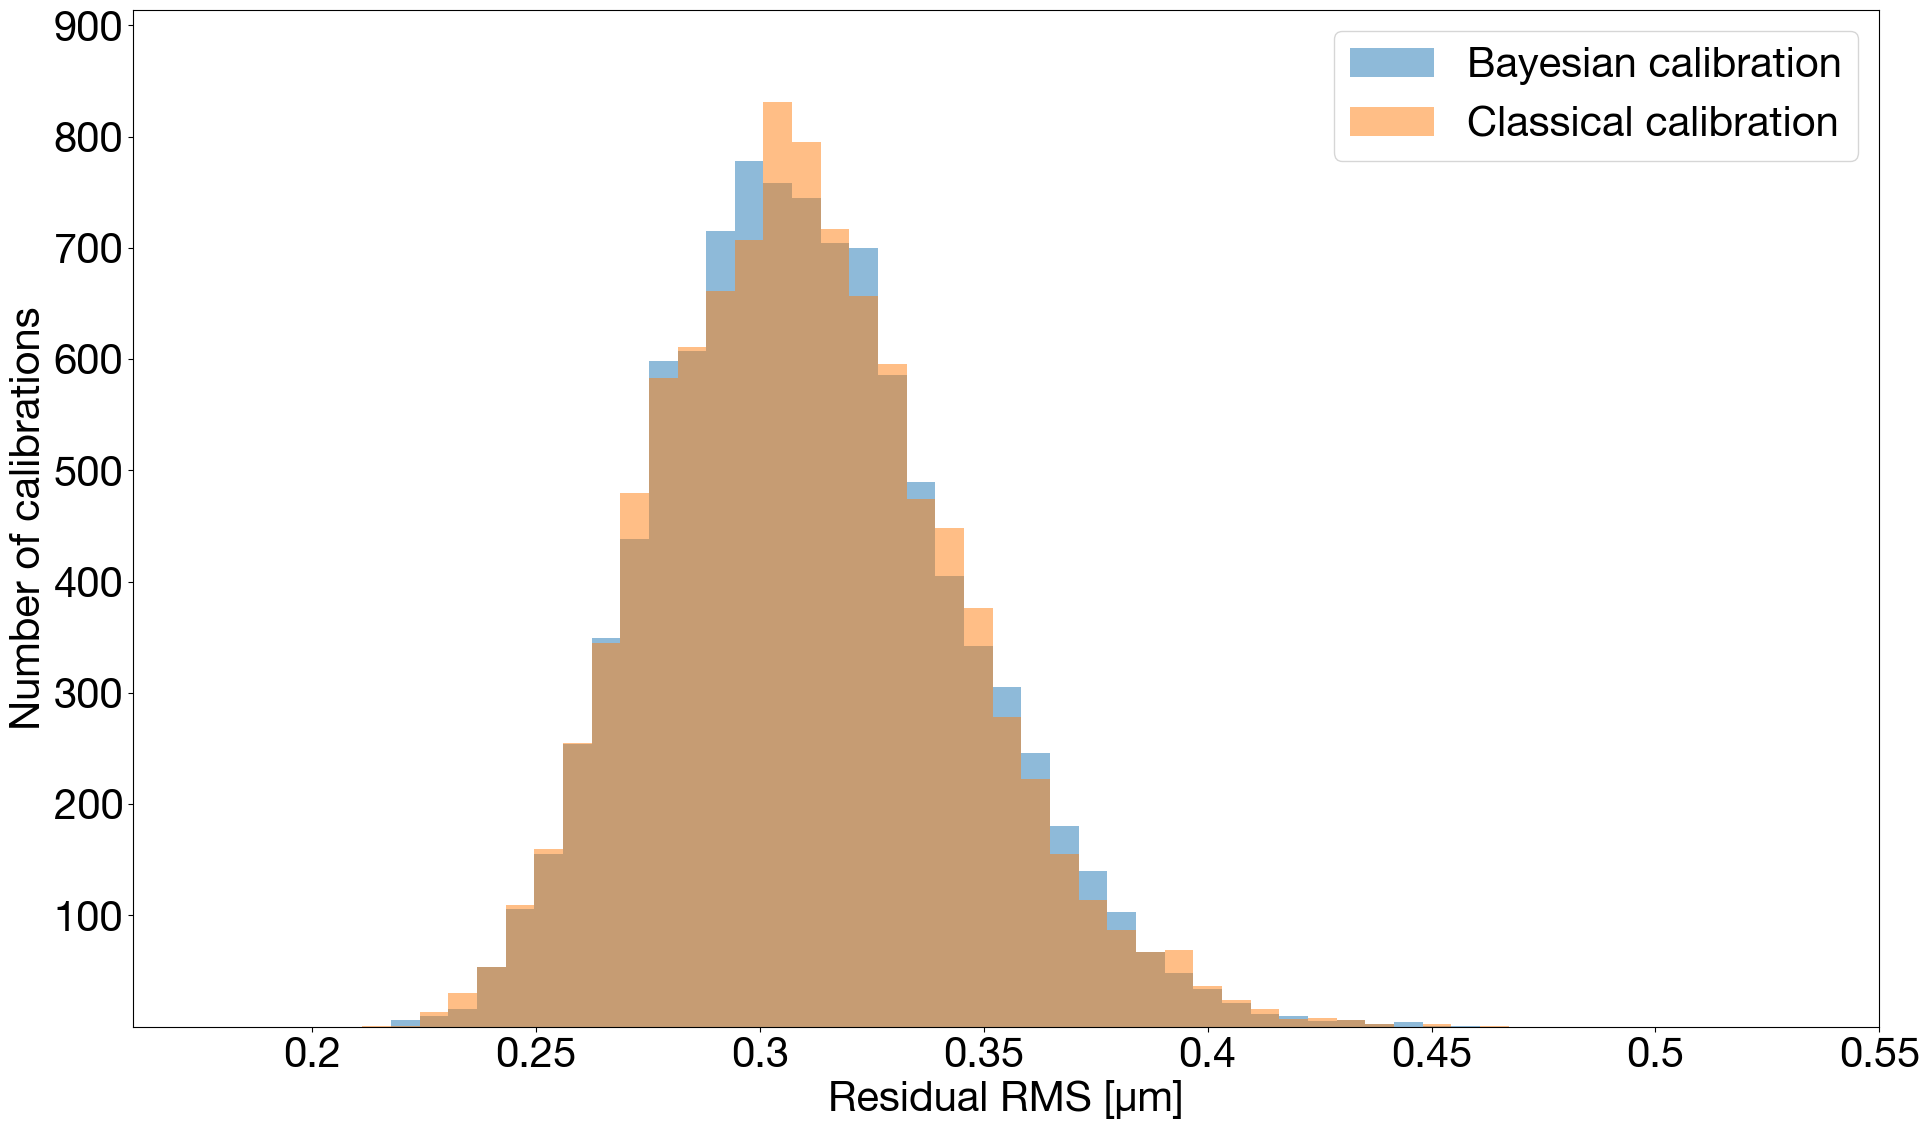

In [76]:
gen_all_plots('accuracy1-no-prior')

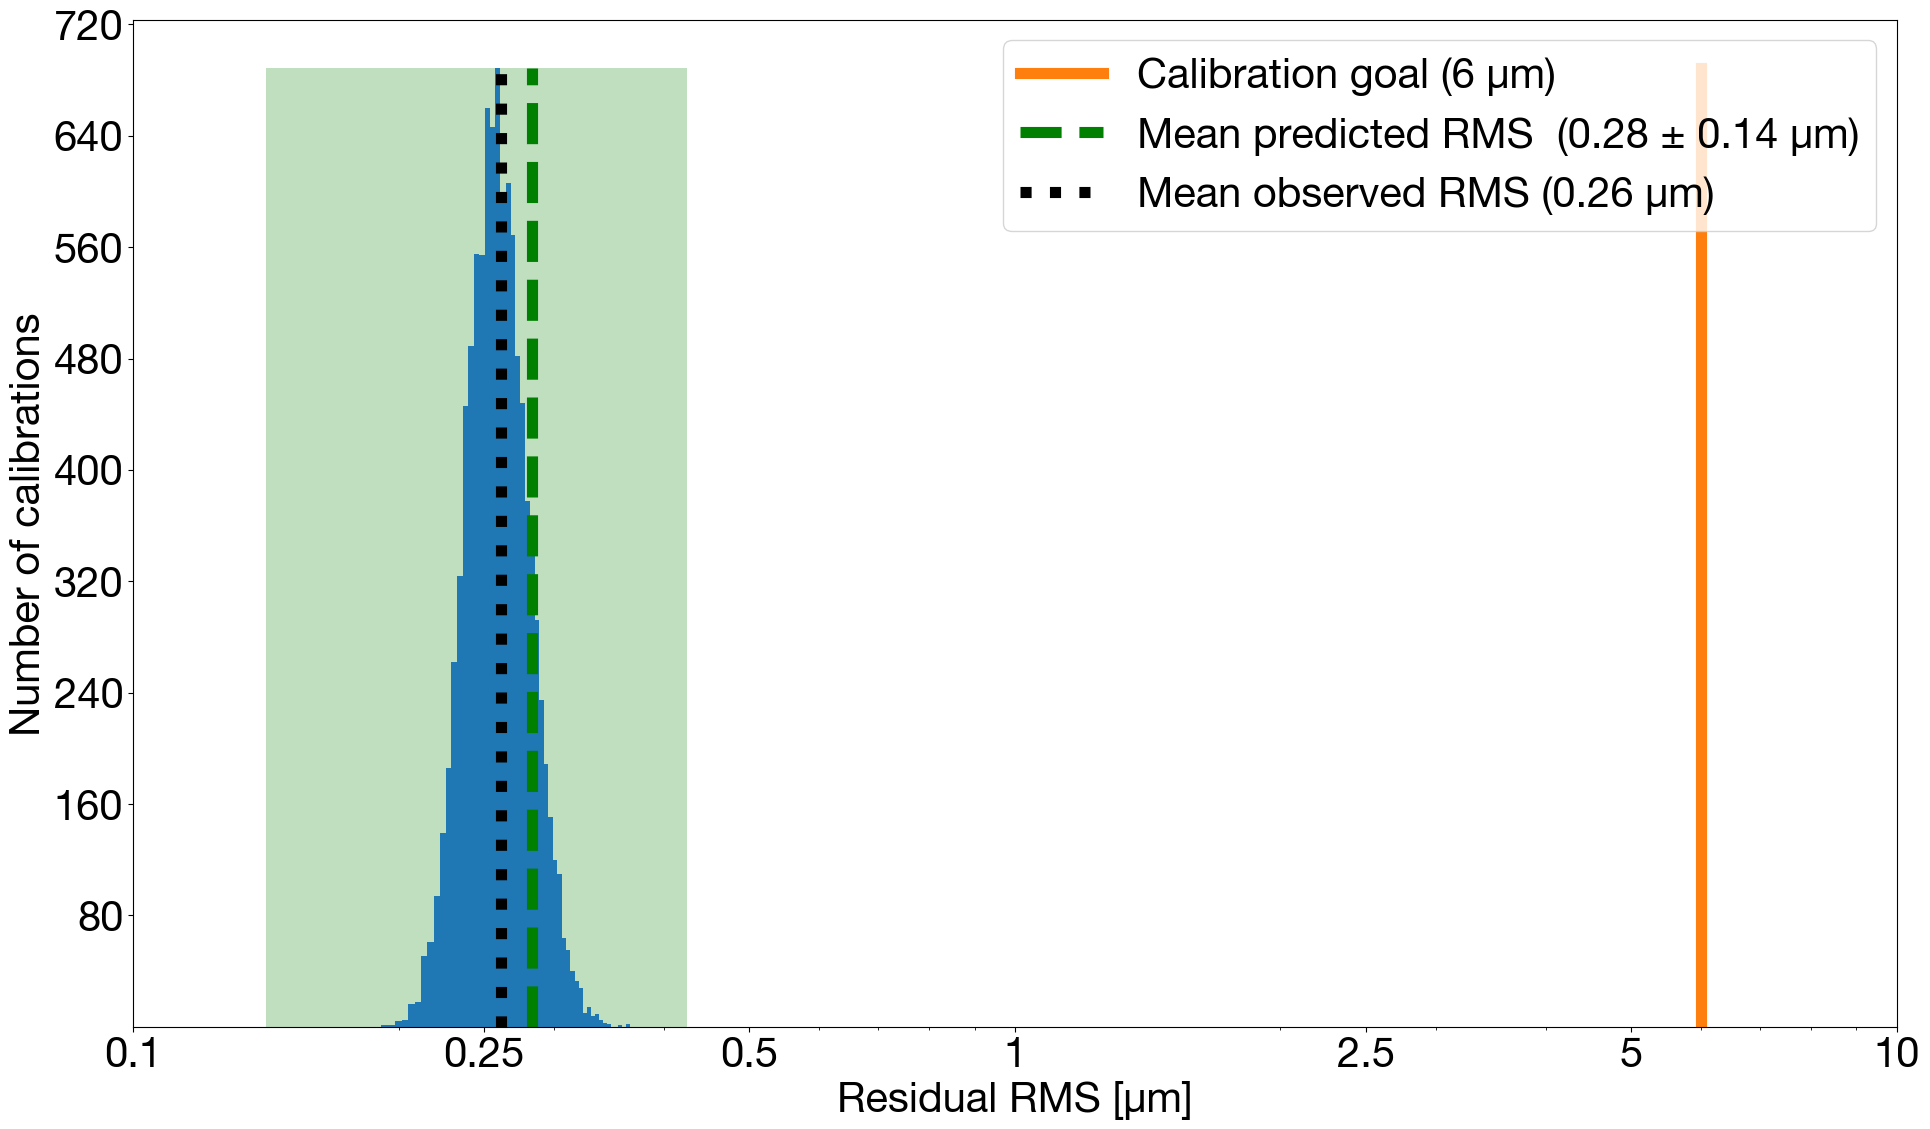

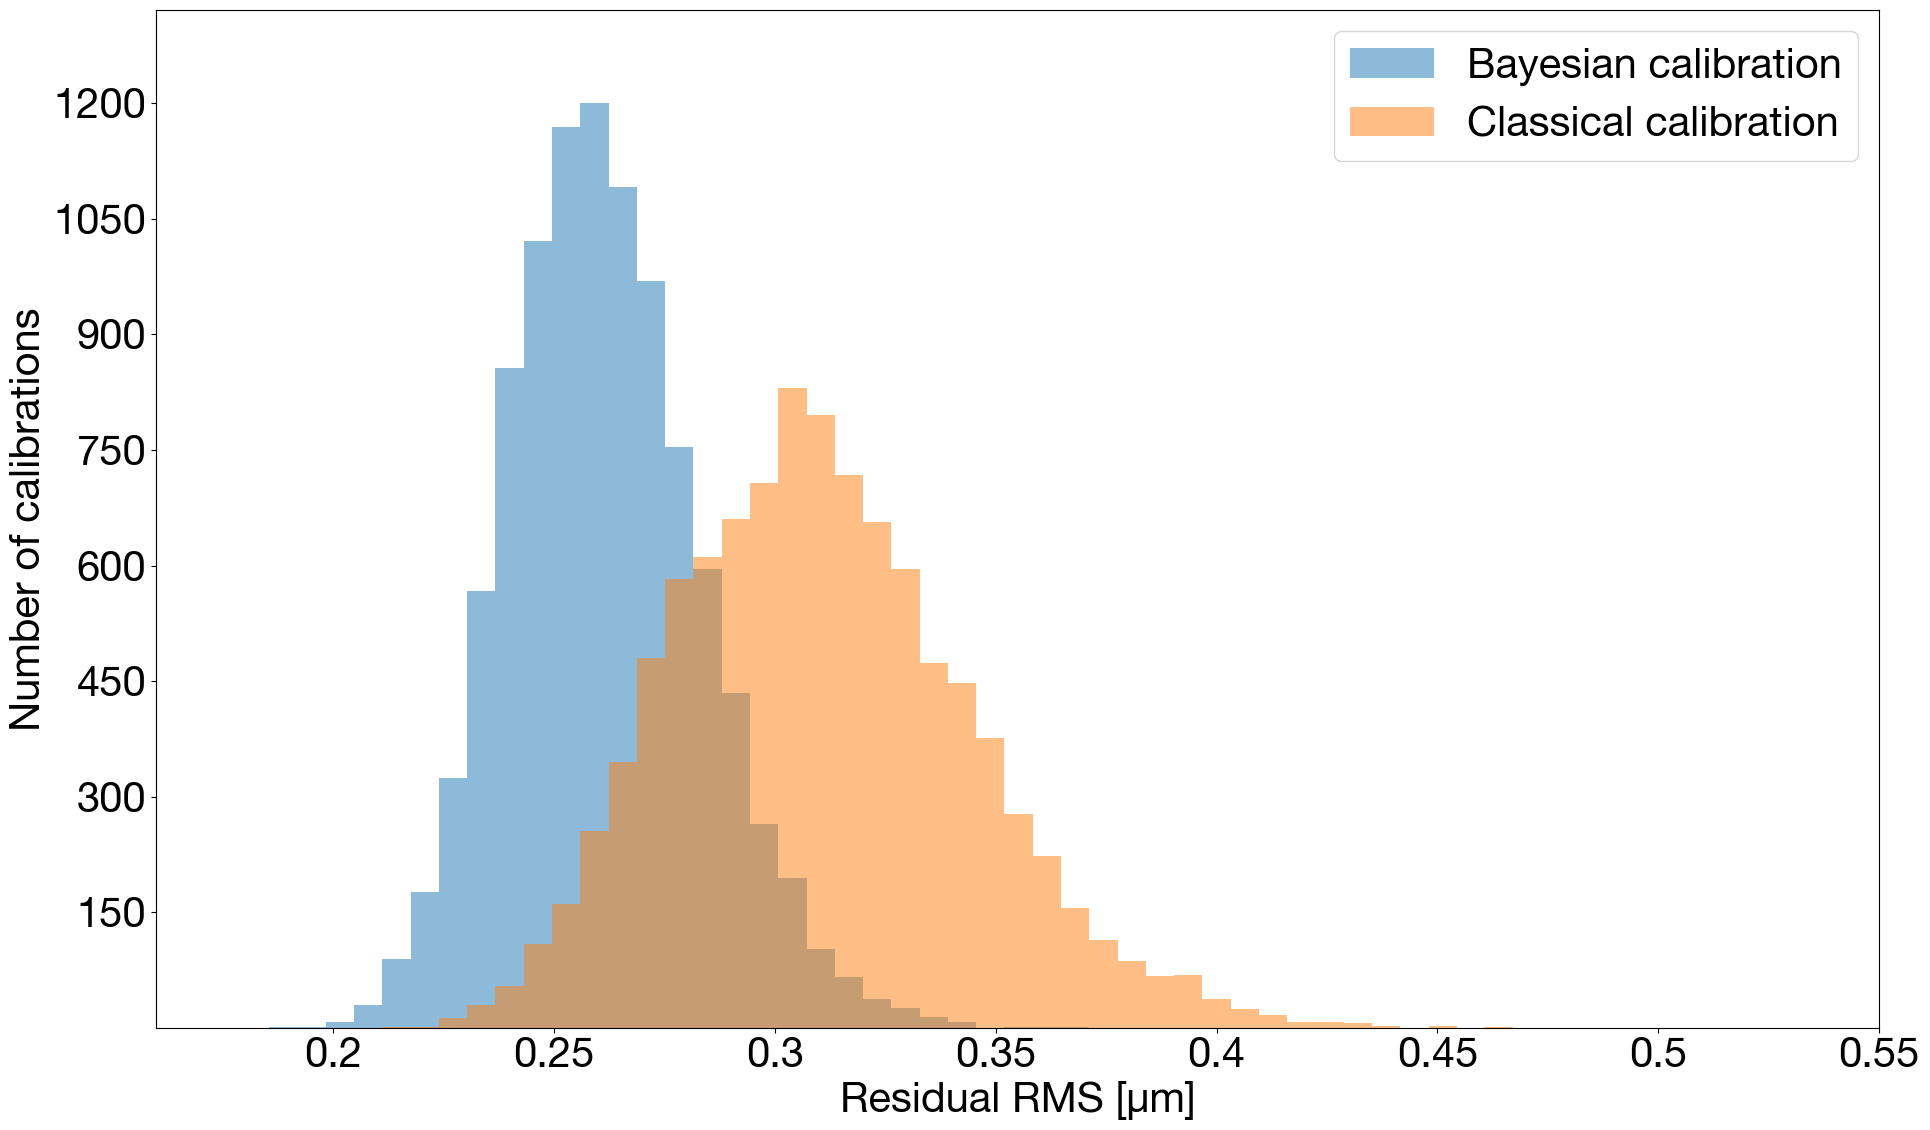

In [13]:
gen_all_plots('accuracy2-no-prior')

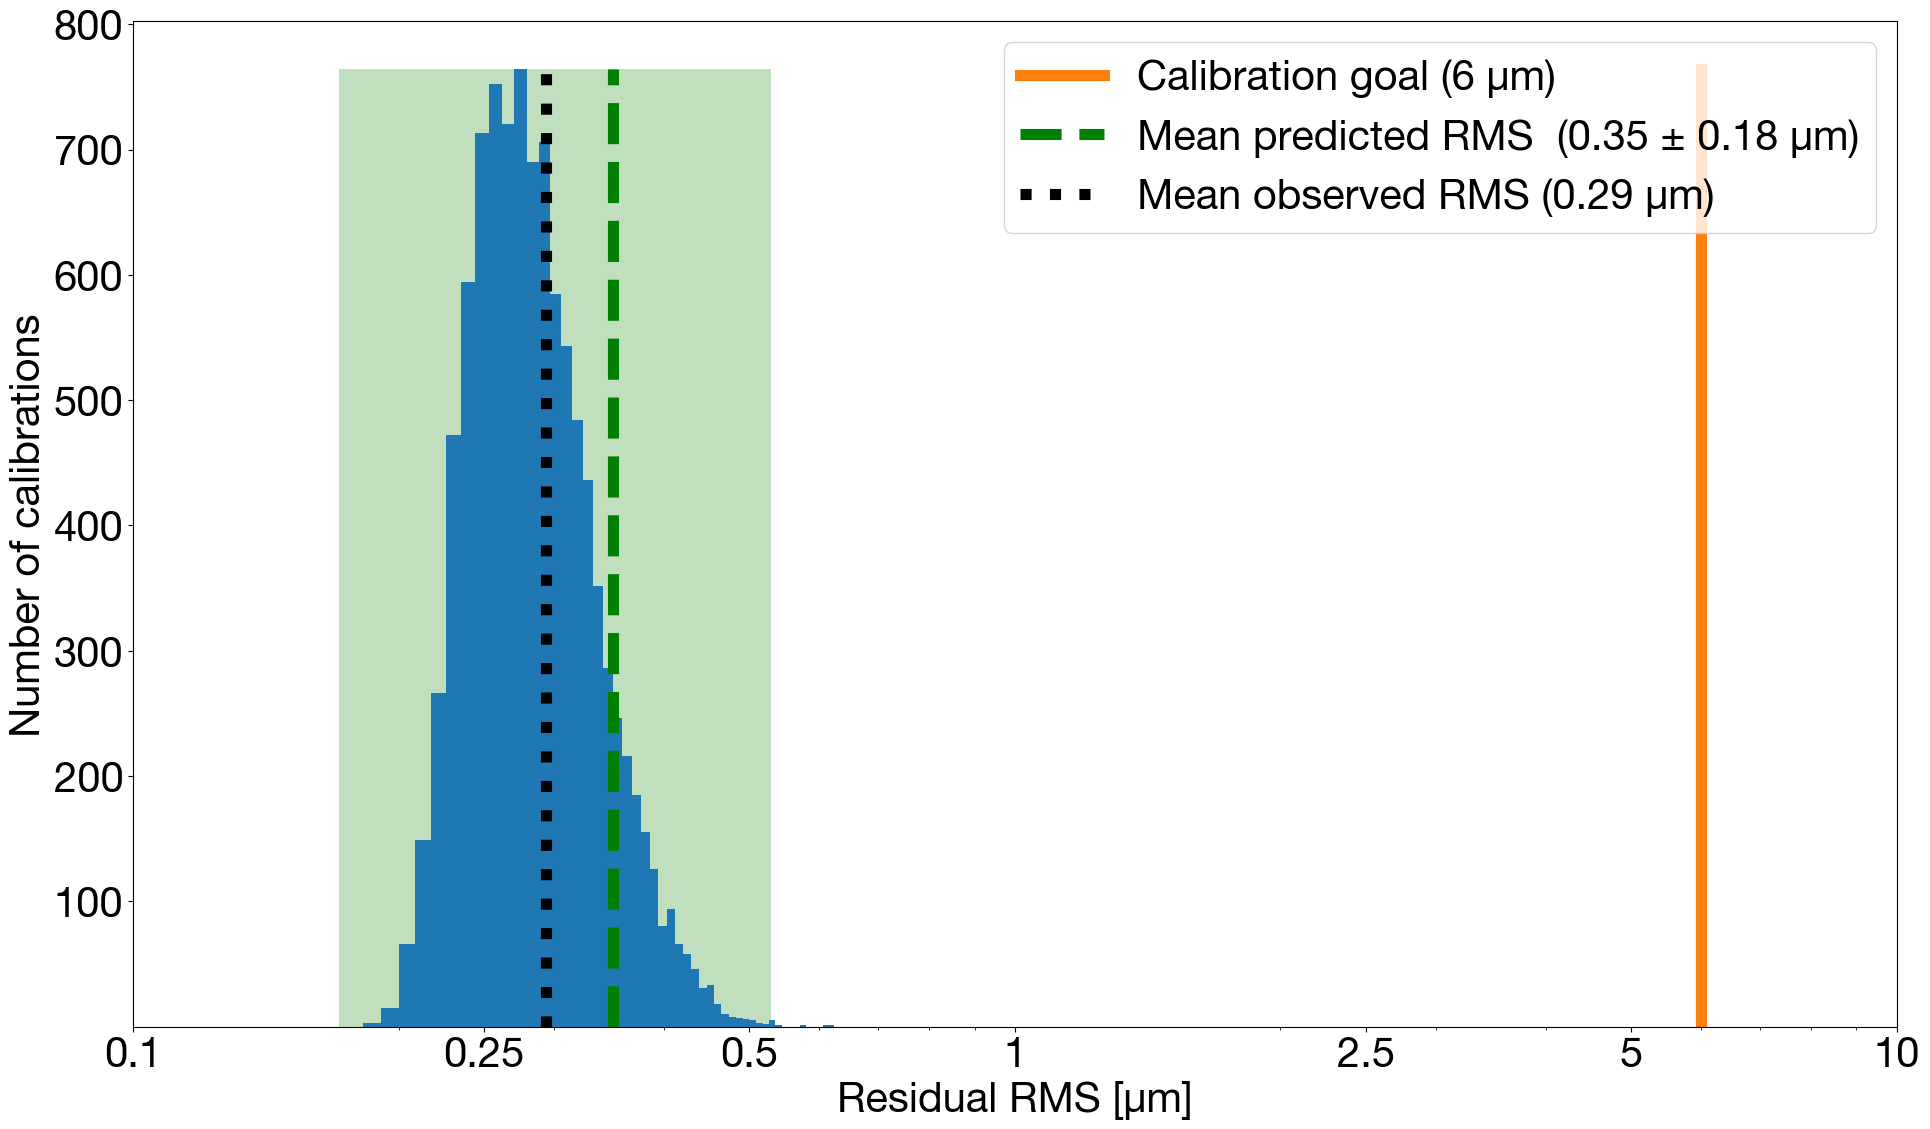

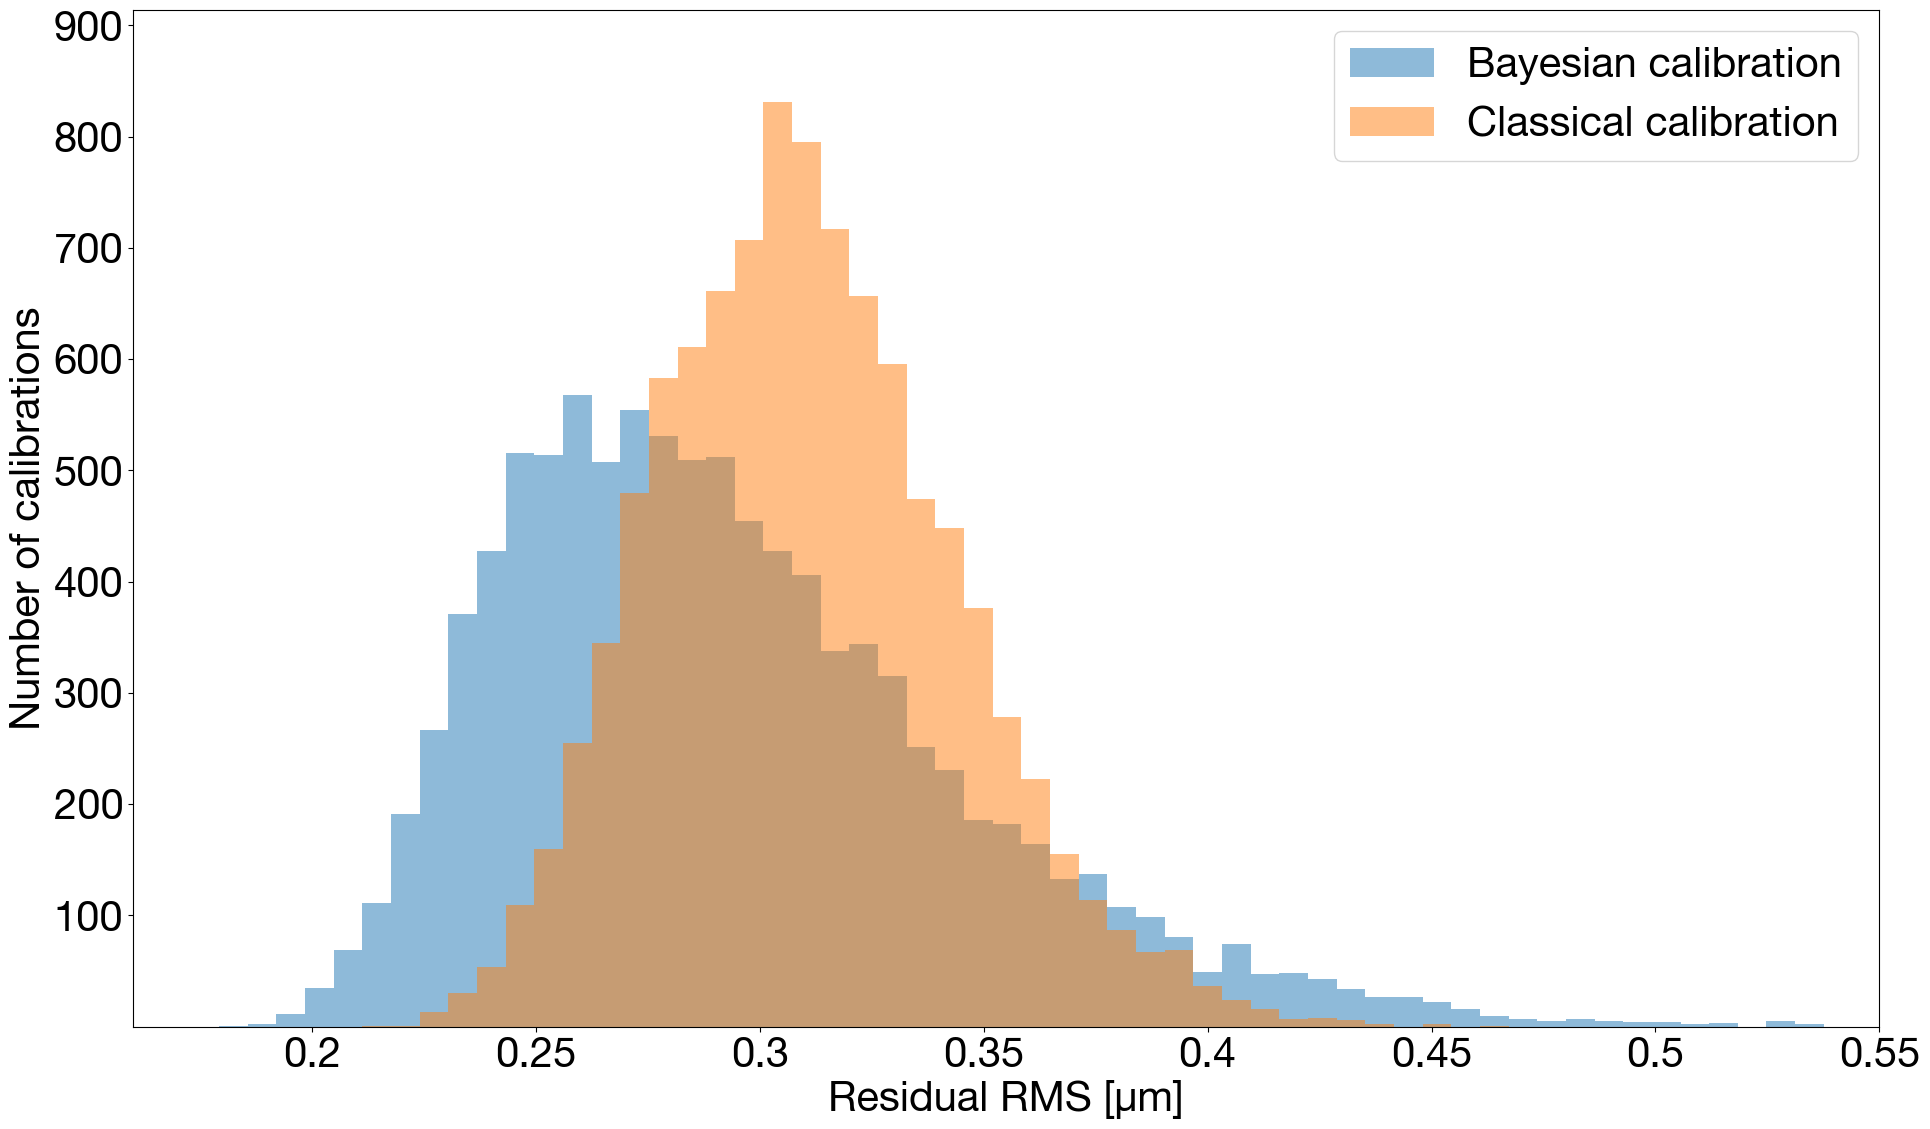

In [39]:
gen_all_plots('errpred_1draw_25cal')

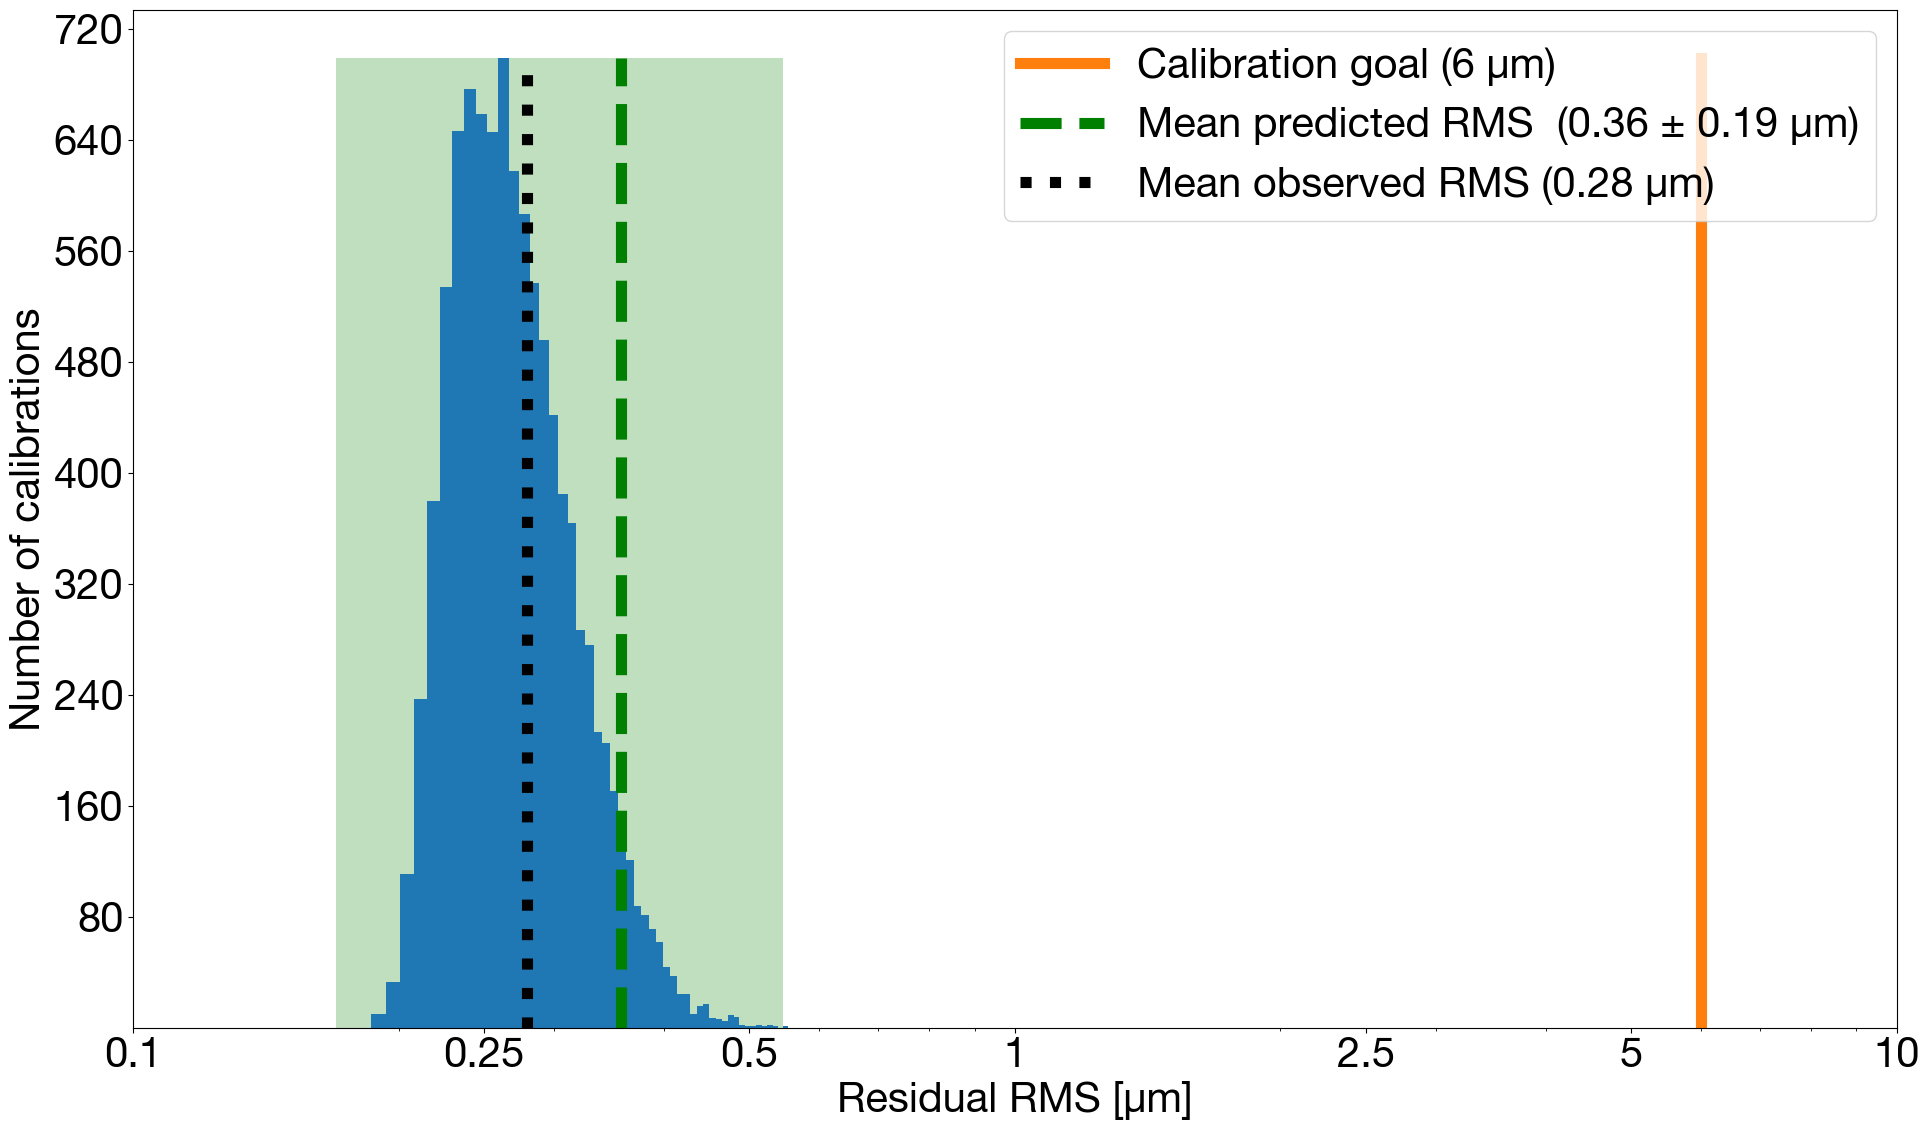

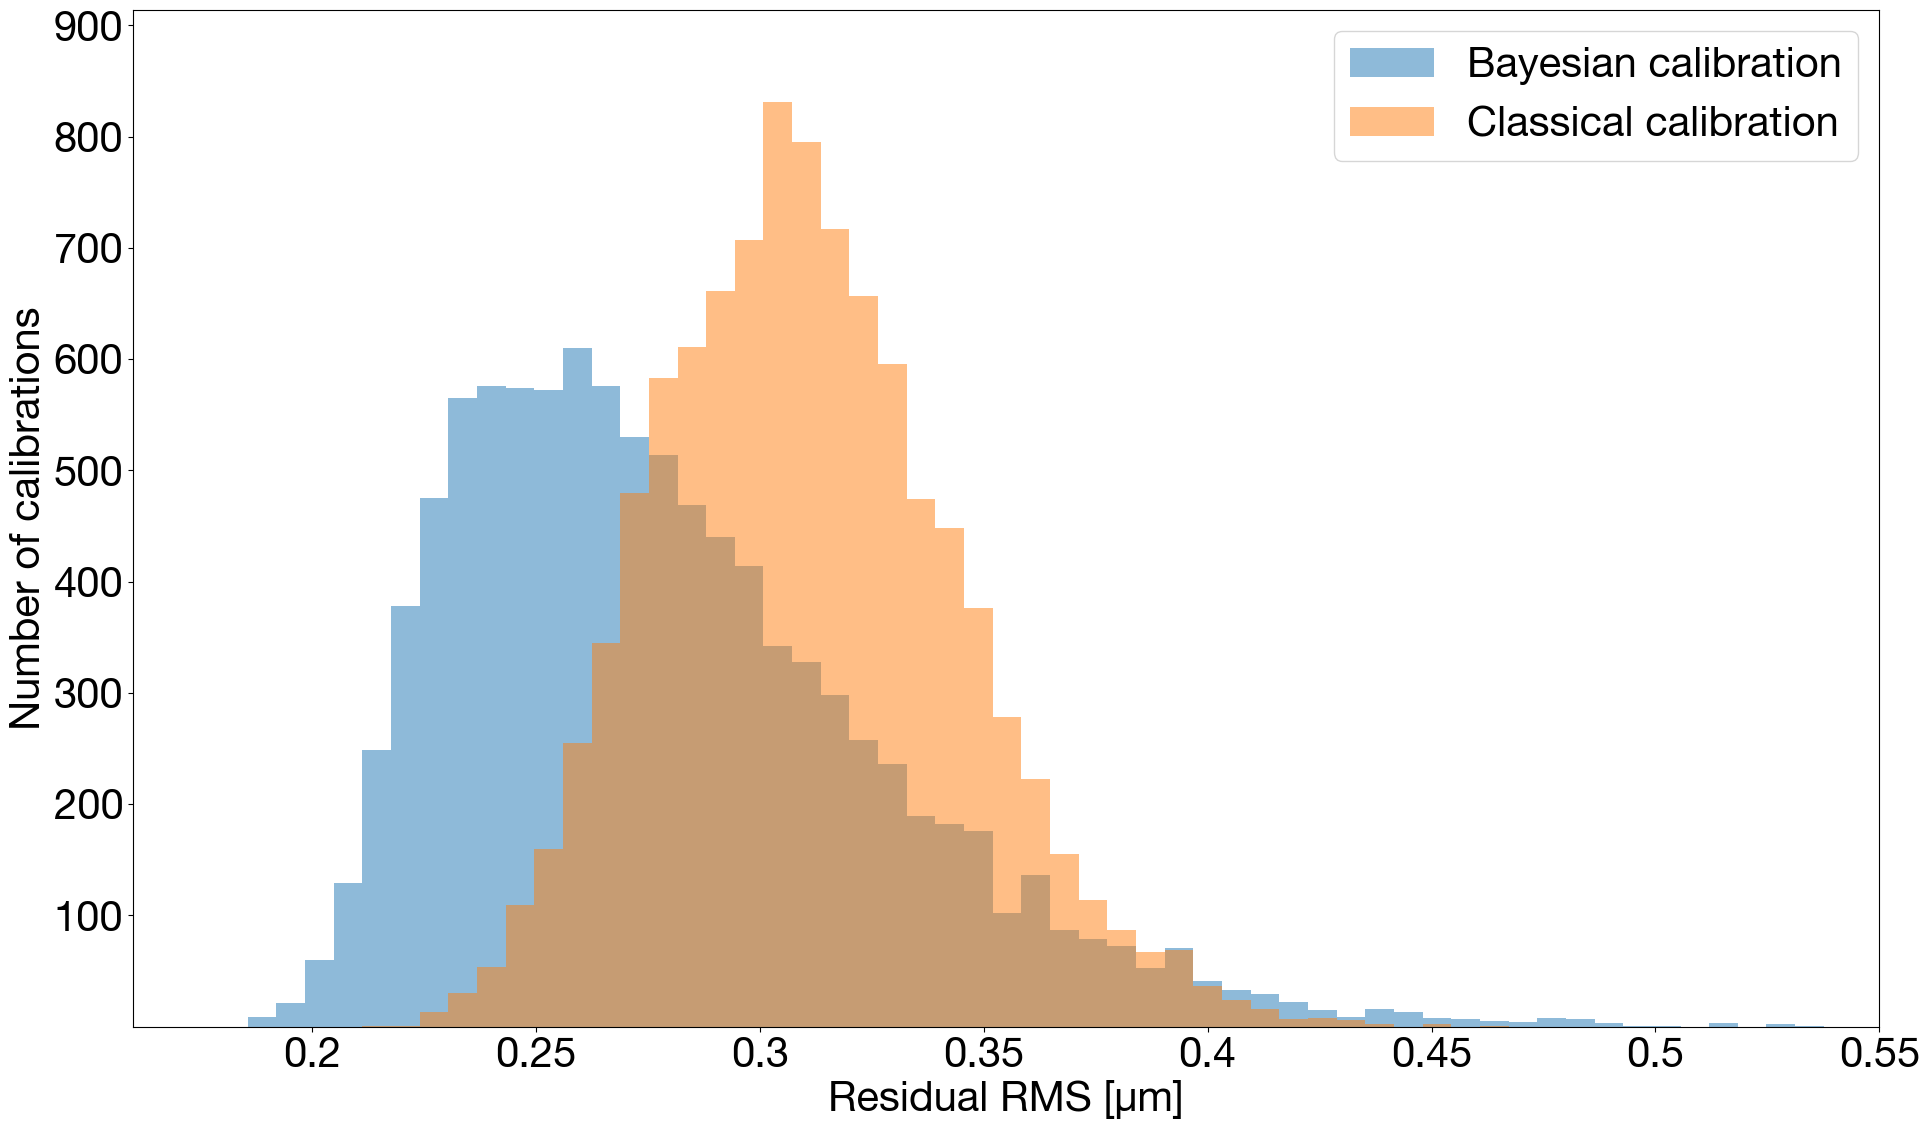

In [40]:
gen_all_plots('errpred_1draw_50cal')

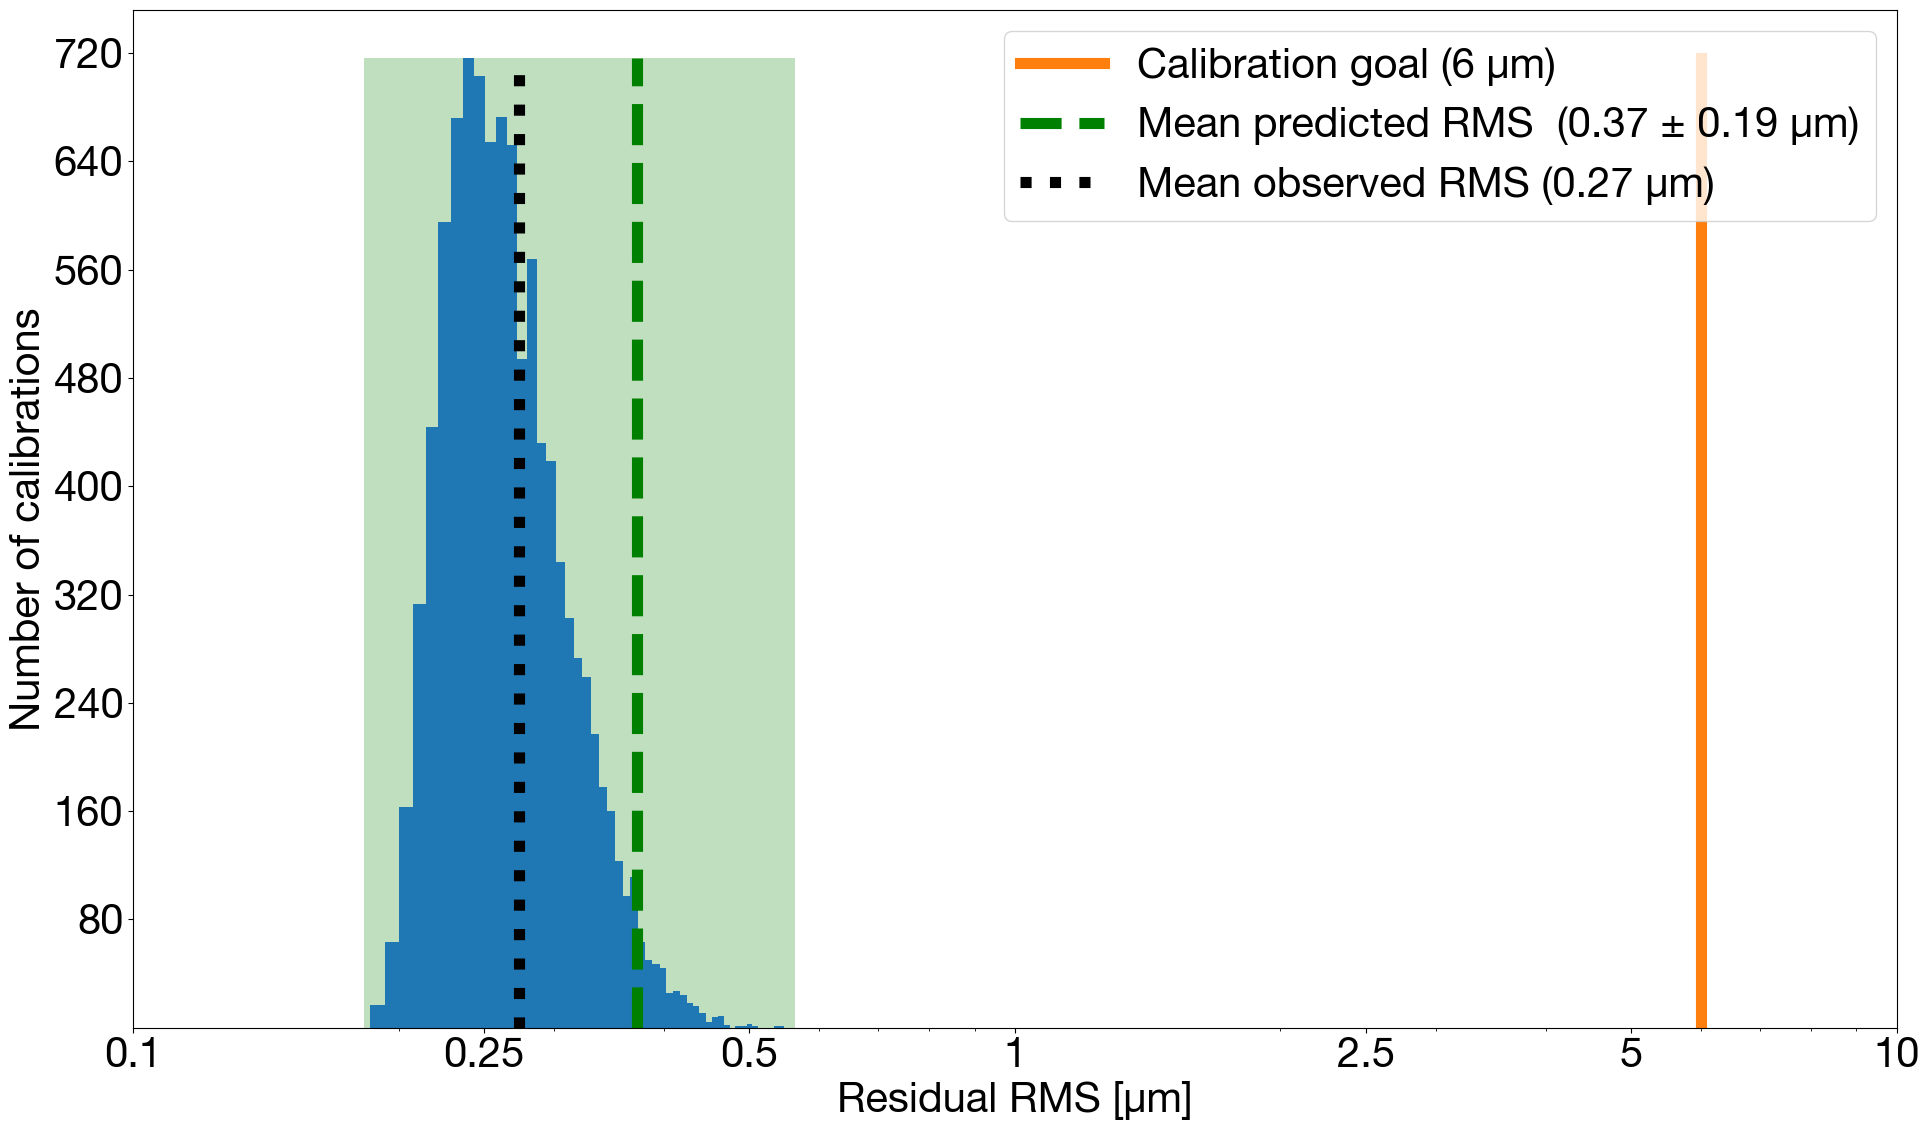

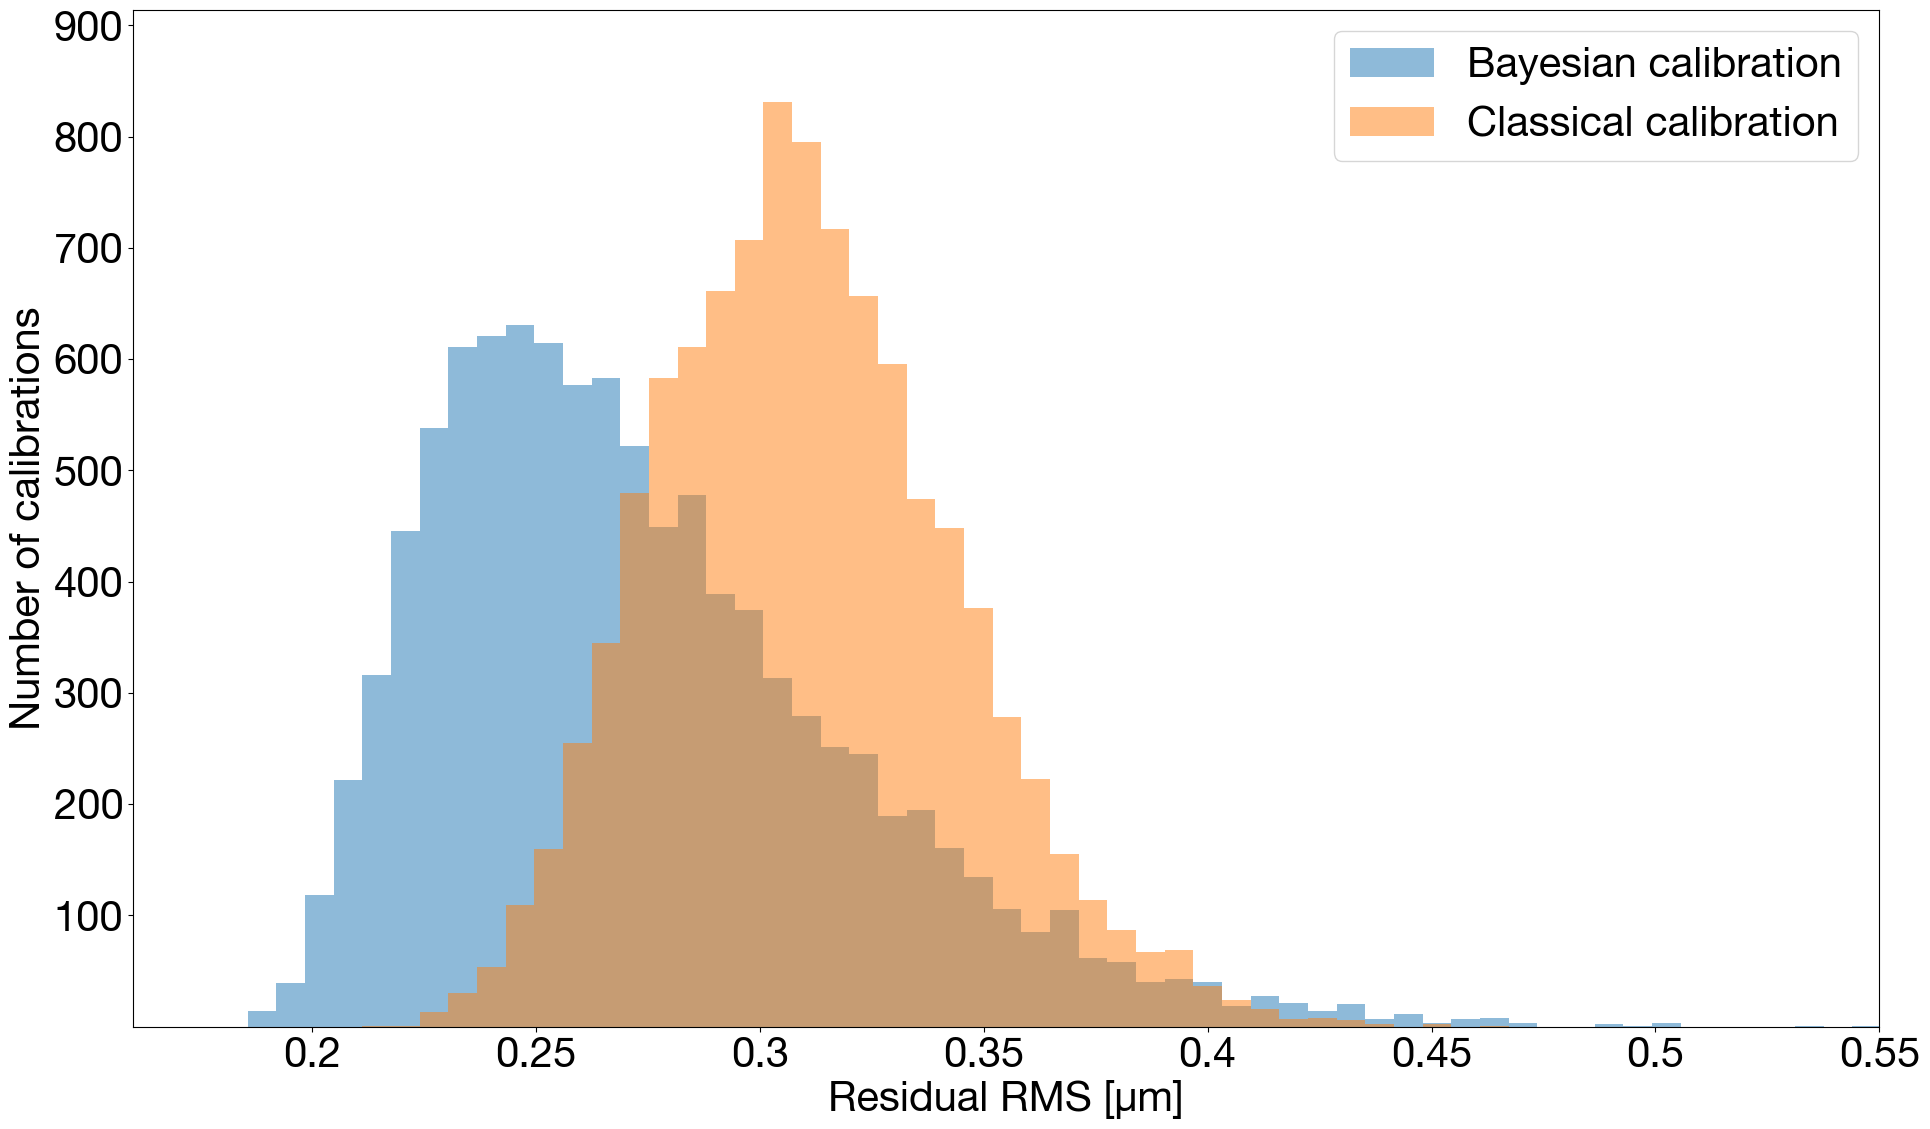

In [38]:
gen_all_plots('errpred_1draw_100cal')

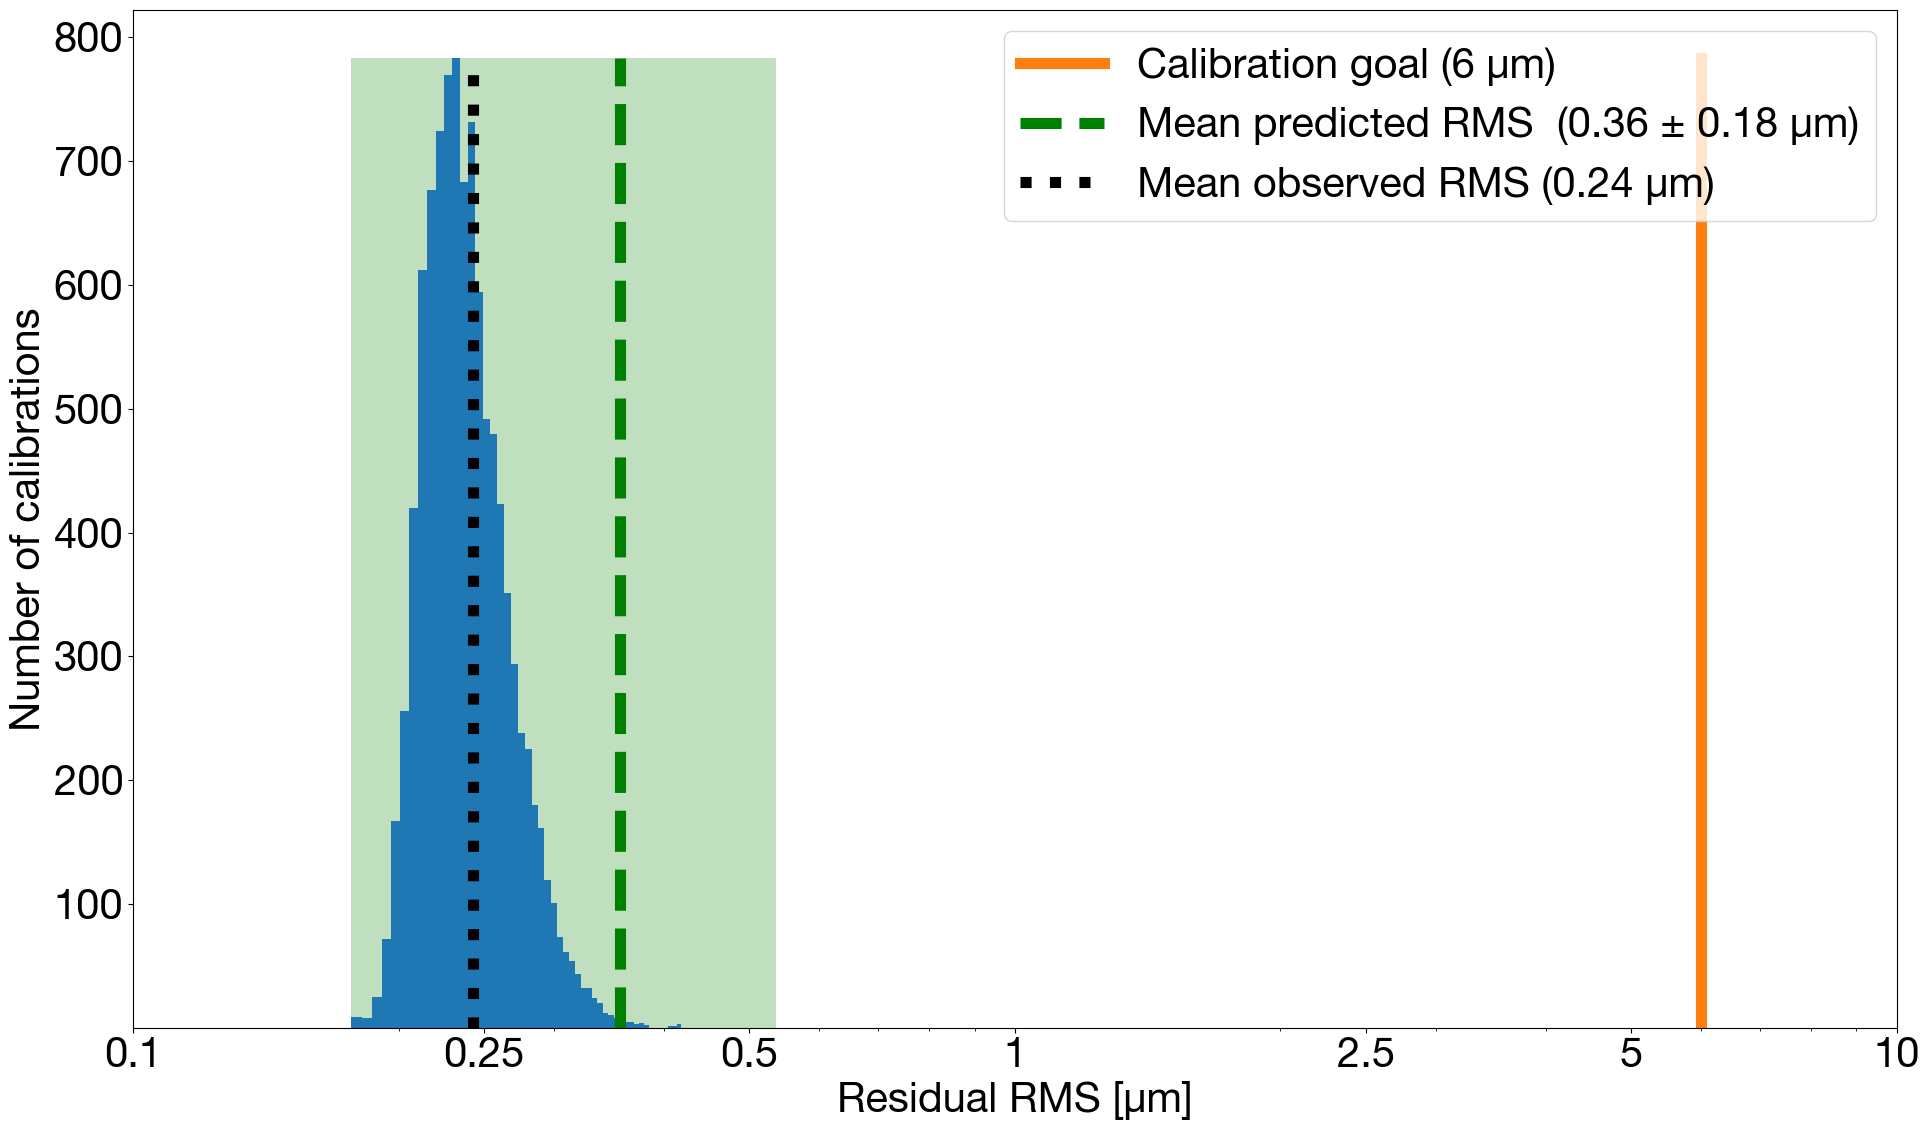

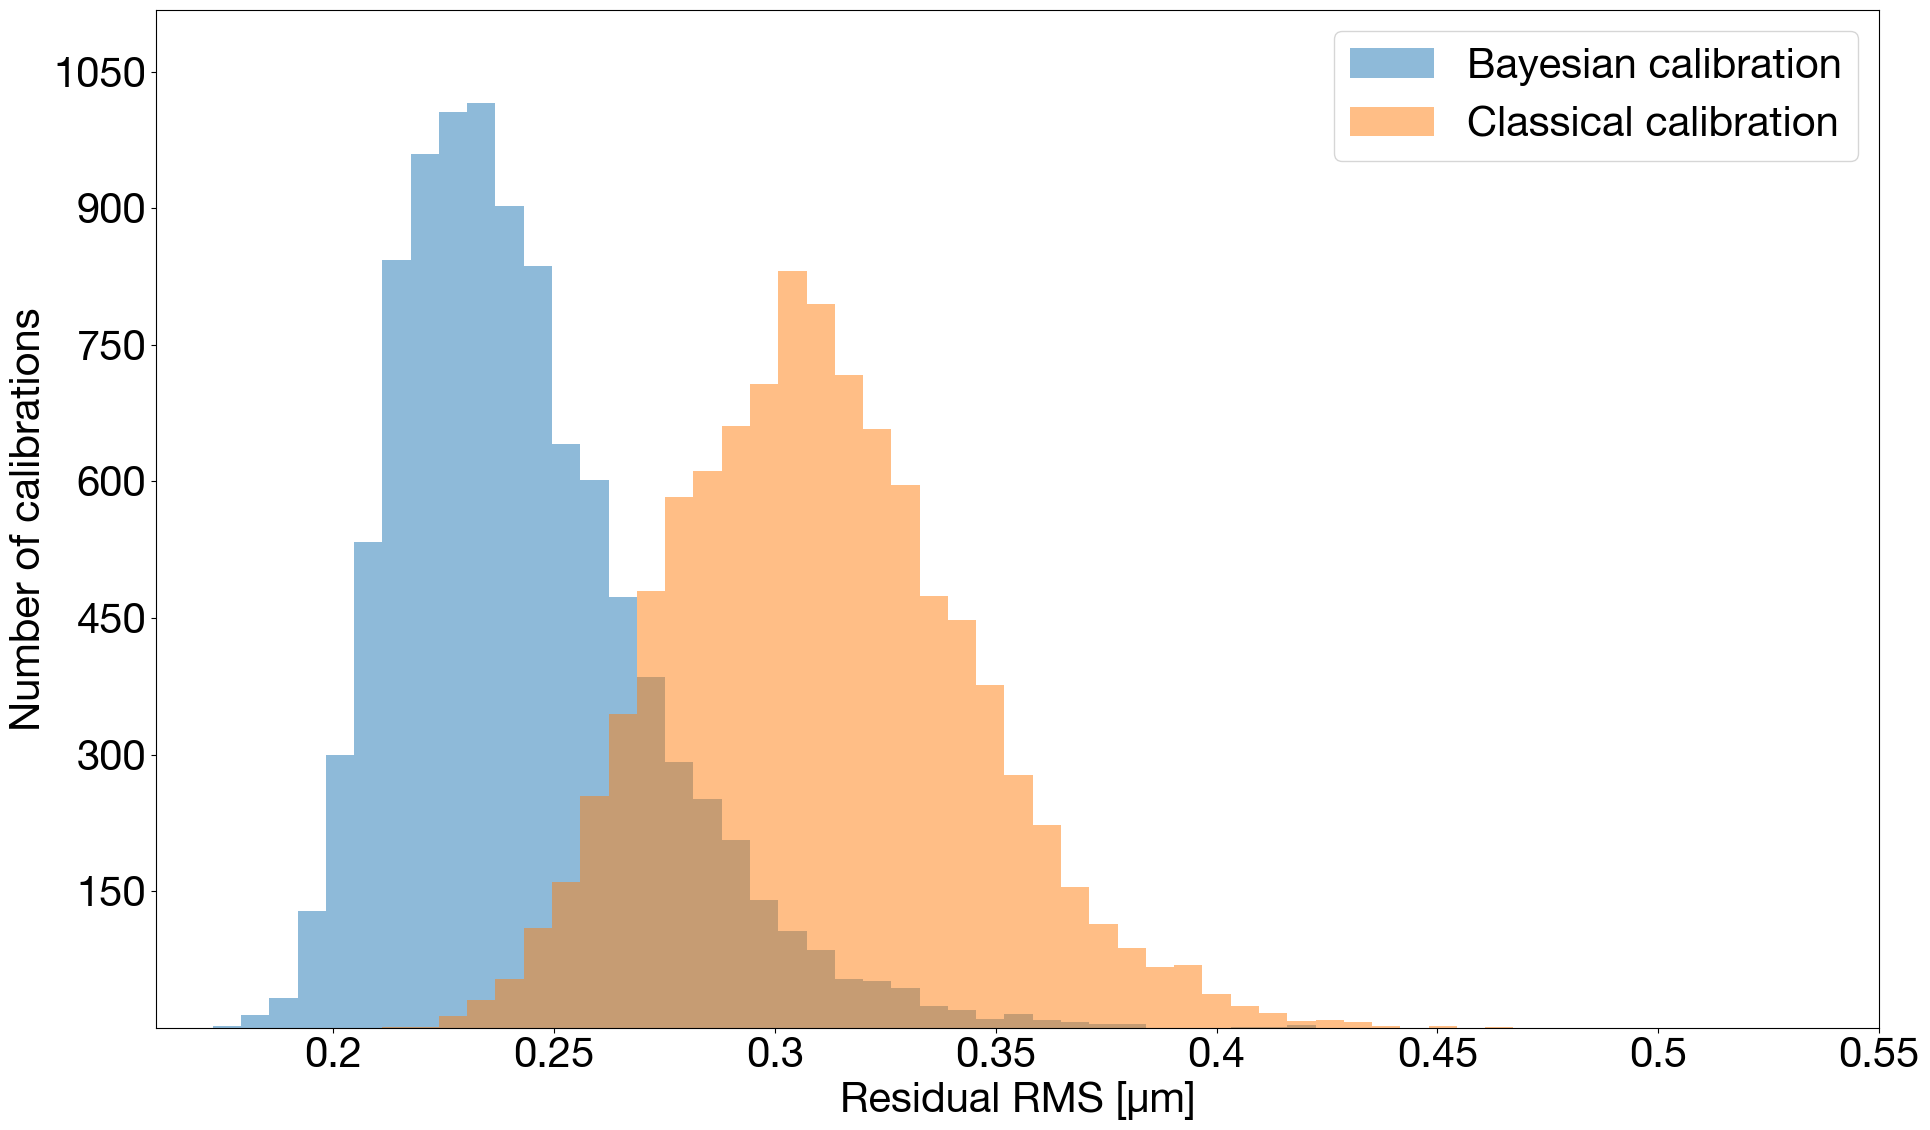

In [15]:
gen_all_plots('errpred_2draw_100cal')

In [65]:
def compare_rms():
    rms25 = []
    rms50 = []
    rms75 = []
    
    crms25 = np.quantile(clasrms, .25) * 1e6
    crms50 = np.quantile(clasrms, .5) * 1e6
    crms75 = np.quantile(clasrms, .75) * 1e6
    
    pred_rms = []
    pred_rms_q13 = []
    
    M = [25, 50, 100, 200]
    
    for i in M:
        direc = fr'errpred_1draw_{i}cal'
        
        f = np.load(direc + '/distances.bin.npz')
        L = f['arr_0'][:, :]
        caldata = np.load(direc + '/caldata.bin.npz')
        nn = caldata['arr_0']
        needed = caldata['arr_1']
        uncertainty = caldata['arr_2']
        est = caldata['arr_3']
        est_var = caldata['arr_4']
        rms = caldata['arr_5']
        Sigma = caldata['arr_6'] 
        
        dx = L[:, 1, 0::2]
        dy = L[:, 1, 1::2]
        d2 = dx ** 2 + dy ** 2
        # rms = np.sqrt(np.mean(d2, axis = 1))
        
        rms25.append(np.quantile(rms, .25) * 1e6)
        rms50.append(np.quantile(rms, .5) * 1e6)
        rms75.append(np.quantile(rms, .75) * 1e6)
        
        #est = np.sqrt(est ** 2 - 0.2e-6 ** 2)
        pred_rms.append(np.mean(est) * 1e6)
        pred_rms_q13.append(.675 * (np.sqrt(np.mean(est_var)) * 1e6))
        
    plt.figure(figsize=(20, 12))
    #plt.scatter(M, pred_rms, 15 ** 2, color = 'red', label = r'$\sigma[\tilde\varepsilon|\varepsilon]$')
    plt.plot([0, 500], [crms25, crms25], linestyle = 'dashed', color = 'black')
    plt.plot([0, 500], [crms50, crms50], linestyle = 'solid', color = 'black', linewidth = 2, label = 'RMS (classical)')
    plt.plot([0, 500], [crms75, crms75], linestyle = 'dashed', color = 'black')
    rms50 = np.array(rms50)
    plt.errorbar(M, rms50, (rms50 - rms25, rms75 - rms50), fmt="o", markersize=15, capsize = 20, linewidth = 5, markeredgewidth=5, label = 'RMS (Bayesian)')
    plt.errorbar(M, pred_rms, (pred_rms_q13, pred_rms_q13), fmt="o", color = 'red', markersize=15, capsize = 20, linewidth = 5, markeredgewidth=5, label = 'Predicted RMS', zorder = -1)
    
    plt.xlim([10, 220])
    plt.xticks(M)
    plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
    plt.gca().yaxis.set_major_locator(MaxNLocator(prune='both'))
    plt.xlabel('Number of classical calibrations')
    plt.ylabel('Distance [µm]')
    plt.ylim([0.1, 0.65])
    plt.legend()

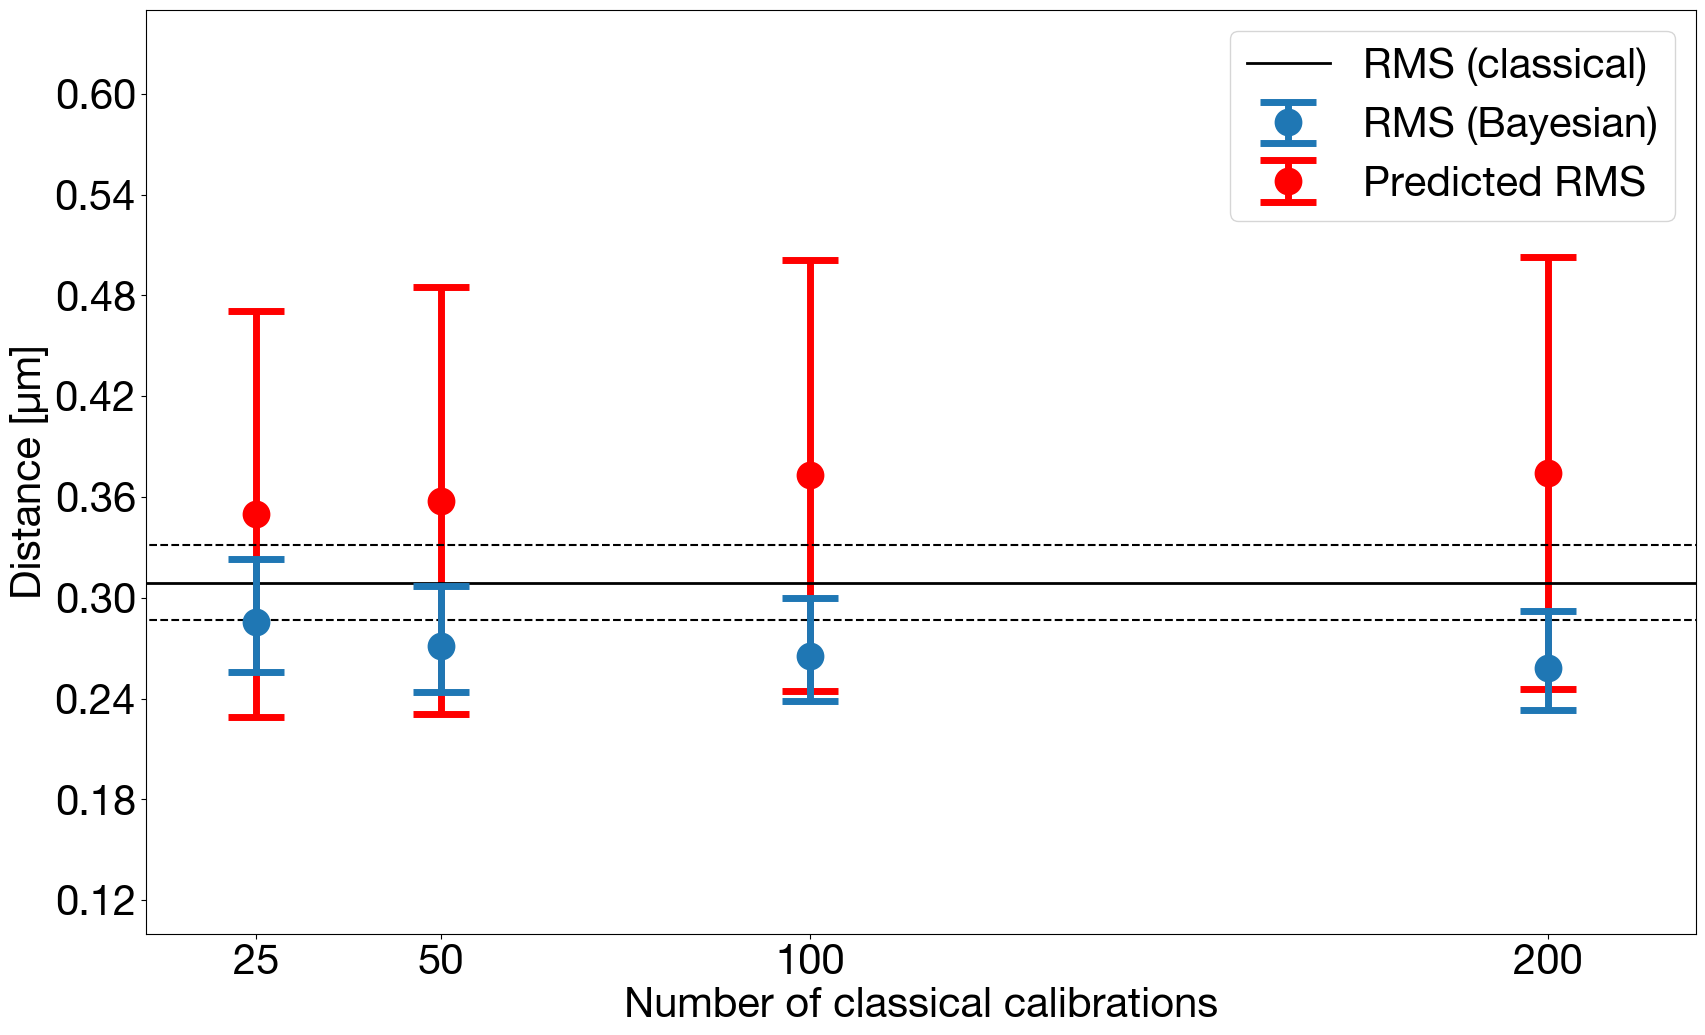

In [66]:
compare_rms()
plt.savefig('compare-rms.svg',bbox_inches='tight')

In [ ]:
plt.semilogy(nn, rms)
plt.savefig('rms_vs_prior.svg')